In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


### Ideal low pass filter 

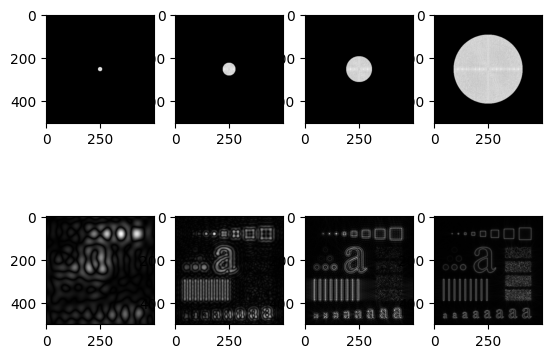

In [61]:
# ideal high pass filter 10 30 60 160


# Get to gray color map for plots
plt.gray()

# Create an array for using to make Ideal low pass filter
[x, y] = np.meshgrid(np.arange(-250, 250), np.arange(-250, 250))
# Take square root from sum of two x and y and make new array with that
D = np.sqrt(x ** 2 + y ** 2)
# save filter 2D size
HShape = D.shape
# Reshape to (1, n) for working easy with that
D = D.reshape(1, -1)
# Create filter and init with zeros
H1 = np.zeros(shape=HShape).reshape(1, -1)
H2 = np.zeros(shape=HShape).reshape(1, -1)
H3 = np.zeros(shape=HShape).reshape(1, -1)
H4 = np.zeros(shape=HShape).reshape(1, -1)

# Find correct range for put variables into filter
x1 = (D[:, :] < 10).reshape(1, -1)
x2 = (D[:, :] < 30).reshape(1, -1)
x3 = (D[:, :] < 60).reshape(1, -1)
x4 = (D[:, :] < 160).reshape(1, -1)

# reinitialize filter to make correct high pass filter
H1[np.where(x1)] = D[x1]
H2[np.where(x2)] = D[x2]
H3[np.where(x3)] = D[x3]
H4[np.where(x4)] = D[x4]

# Convert to 2D filter
H1 = H1.reshape(HShape)
H2 = H2.reshape(HShape)
H3 = H3.reshape(HShape)
H4 = H4.reshape(HShape)

# Read image from file
img = cv2.imread("/content/fig4.11.jpg", cv2.IMREAD_GRAYSCALE)
# Take Fourier transform
dft = np.fft.fft2(img)
imgF = np.fft.fftshift(dft)
# Conv filter and mask in frequency mode
M_I1 = imgF * H1
M_I2 = imgF * H2
M_I3 = imgF * H3
M_I4 = imgF * H4

# Take real part of complex number
M_Id1 = np.abs(M_I1)
M_Id2 = np.abs(M_I2)
M_Id3 = np.abs(M_I3)
M_Id4 = np.abs(M_I4)

# Take log from image
M_IdLog1 = np.log(1 + M_Id1)
M_IdLog2 = np.log(1 + M_Id2)
M_IdLog3 = np.log(1 + M_Id3)
M_IdLog4 = np.log(1 + M_Id4)

# Calc max of 2D image
Max1 = np.max(np.max(M_IdLog1))
Max2 = np.max(np.max(M_IdLog2))
Max3 = np.max(np.max(M_IdLog3))
Max4 = np.max(np.max(M_IdLog4))

# Plot image
plt.subplot(241)
plt.imshow(M_IdLog1 / Max1)
plt.subplot(242)
plt.imshow(M_IdLog2 / Max2)
plt.subplot(243)
plt.imshow(M_IdLog3 / Max3)
plt.subplot(244)
plt.imshow(M_IdLog4 / Max4)

# Return from frequency to place
IFFT1 = np.fft.ifft2(np.fft.ifftshift(M_I1))
IFFT2 = np.fft.ifft2(np.fft.ifftshift(M_I2))
IFFT3 = np.fft.ifft2(np.fft.ifftshift(M_I3))
IFFT4 = np.fft.ifft2(np.fft.ifftshift(M_I4))

# Take real part of complex number
IFFTt1 = np.abs(IFFT1)
IFFTt2 = np.abs(IFFT2)
IFFTt3 = np.abs(IFFT3)
IFFTt4 = np.abs(IFFT4)

# Calc max of 2D image
Max21 = np.max(np.max(IFFTt1))
Max22 = np.max(np.max(IFFTt2))
Max23 = np.max(np.max(IFFTt3))
Max24 = np.max(np.max(IFFTt4))

# Plot image
plt.subplot(245)
plt.imshow(IFFTt1 / Max21)
plt.subplot(246)
plt.imshow(IFFTt2 / Max22)
plt.subplot(247)
plt.imshow(IFFTt3 / Max23)
plt.subplot(248)
plt.imshow(IFFTt4 / Max24)
plt.show()